In [170]:
%matplotlib notebook
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Tree :
    def __init__(self,width,height) :
        self.width = width
        self.height = height
        self.roots = [(height//2,width//2)]
        self.image = np.full((height,width,3),255)
        self.nb_childs = [4]
        self.fig = plt.figure()
        self.img = plt.imshow(self.image)
        self.color = 0.0
        
    def __surrounding_coordinates(self,root) :
        i,j = root
        coordinates = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
        random.shuffle(coordinates)
        return coordinates
    
    def __is_location_free(self,root) :
        i,j = root
        if -1<i<self.height and -1<j<self.width and self.image[i][j][0]==255 : 
            return True
        return False
    
    def __modify_pixel_color(self,root) :
        i,j = root
        self.image[i][j] = np.array([0,int(self.color),0])
        
    def __create_root_childs(self,root,nb_childs) :
        self.__modify_pixel_color(root)
        coordinates = self.__surrounding_coordinates(root)
        while coordinates!=[] and nb_childs>0 :
            child = coordinates.pop()
            if(self.__is_location_free(child)) :
                self.roots.append(child)
                nb_childs-=1
                
    def __create_all_childs(self) :
        roots_cpy = self.roots.copy()
        self.roots.clear()
        tab = []
        self.color+=255/self.width
        for root in roots_cpy :
            nb_childs = random.choice(self.nb_childs)
            self.__create_root_childs(root,nb_childs)
            tab.append(abs(nb_childs - 4))
        self.nb_childs.extend(tab)
        
    def __generator(self) :
        while self.roots!=[] :
            yield 1
    
    def __animate(self,i) :
        self.__create_all_childs()
        self.img.set_data(self.image)
        return self.img,
    
    def show(self) :
        self.ani = FuncAnimation(self.fig,self.__animate, self.__generator,interval=10, blit=True)
        plt.show()

<IPython.core.display.Javascript object>


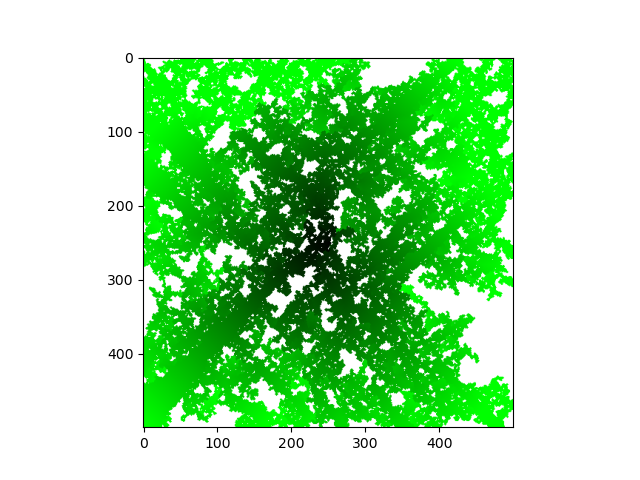

In [171]:
T = Tree(500,500)
T.show()